## Observations and Insights

In [1]:
#250 mice were diagnosed with a tumor and were administered a variety of drugs.
#The tumors were monitored and evaluated for 45 days.

#The results of the drug therapy indicated that Capomullin and Ramicane yielded
#near identical results.

#Summary - Capomulin was successful in reducing the tumors over the 45 day treatment,
#It's not certain what a longer course of treatment would yield, but that would be
#an interesting test for Pymaceuticals to implement.  There was an outlier in the Iffubinol
#protocol, this is indicated on the box and whisker chart.

#Another possible analysis would be to determine the results on male and female mice.  

#Conclusion -  Capomulin could be a drug of choice for treating tumor growth based
#on this study.  Other considerations could be cost, and the course of treatment for full
#shrinkage.


## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import scipy.stats as ss

#CSV files 
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse_data and the study_results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine data into a single dataset

In [3]:
#create dataframe for mouse_metadata
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
#create dataframe for study_results
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,45,22.050126,1
1,s185,45,23.343598,1
2,k403,40,24.365505,1
3,s185,40,25.472143,1
4,k403,35,26.546993,1
...,...,...,...,...
1888,t724,45,75.113288,2
1889,m269,45,75.123690,1
1890,p189,45,75.294936,4
1891,l725,45,76.668817,3


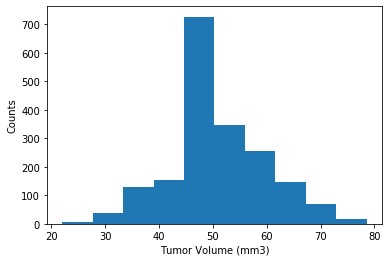

Mean: 50.45
Median: 48.95
Mode: 0    45.0
dtype: float64
NormaltestResult(statistic=3.8777844575739087, pvalue=0.14386322908269367)


In [5]:
# Plot the data for the study results as a histogram and test it to see if it is normally distributed
plt.hist(study_results['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Counts')
plt.show()
print(f"Mean: {round(study_results['Tumor Volume (mm3)'].mean(),2)}")
print(f"Median: {round(study_results['Tumor Volume (mm3)'].median(),2)}")
print(f"Mode: {round(study_results['Tumor Volume (mm3)'].mode(),2)}")
print(st.normaltest(study_results['Tumor Volume (mm3)'].sample(100)))

In [6]:
# Merge data frames
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
Mouse ID              1893 non-null object
Drug Regimen          1893 non-null object
Sex                   1893 non-null object
Age_months            1893 non-null int64
Weight (g)            1893 non-null int64
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


## Summary statistics

In [7]:
# create df to store the mean, median, vol variance, vol stdev and vol-sem
#np.seterr(divide='ignore', invalid='ignore')
drug_group_stats = combined_data.groupby('Drug Regimen').agg(\
        # Find the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Find the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Find the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Find the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Find the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
        ).round(3)
# Display the Summary statistics table grouped by 'Drug Regimen' column
drug_group_stats

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar plots

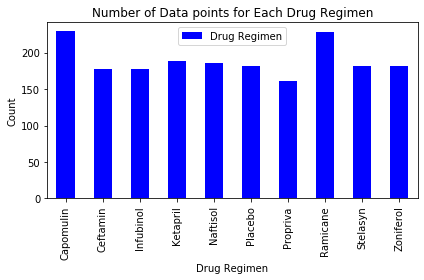

In [8]:
# Create a df to group the 'Drug Regimen' column (Pandas)
drug_group = combined_data.groupby('Drug Regimen')

# Create a df to count the data points for each drug regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())


# Create the bar chart based of the count by drug, and format
count_chart = drug_group_count.plot(kind='bar', title="Number of Data points for Each Drug Regimen", color="blue")

# Set the x and y label
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()
# Save the figure
#plt.savefig("figures/PandaBarChart.png")

plt.show()

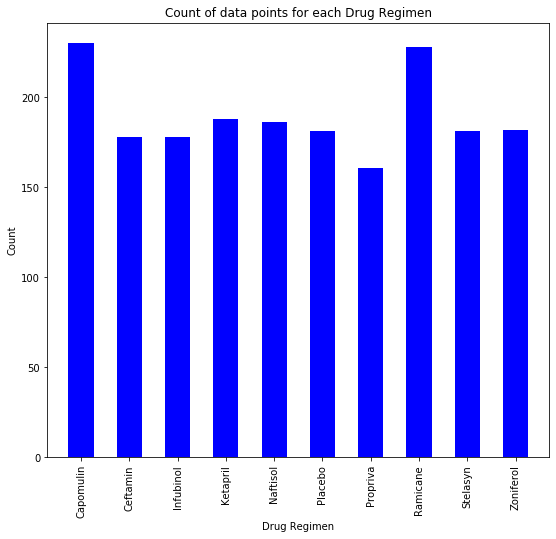

In [9]:
# Create a bar chart with the number of data points for each drug treatment (Pyplot)


# Create x axis and tick marks
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

 # Create the bar chart based of the count by drug, and format
plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.52)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

# Set Title and labels
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
#plt.legend(column_name,loc="best")

# Save the figure

plt.show()

## Pie plots

In [10]:
# Generate a pie plsot showing the distribution of female versus male mice using pandas

In [11]:
sex_group = combined_data.groupby('Sex')
sex_group_count = pd.DataFrame(sex_group['Sex'].count())
sex_group_count

,Sex
Sex,
Female,935
Male,958


In [12]:
# Create a pie plot of Male & Female distribution

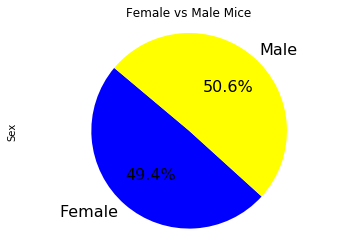

In [13]:
sex_group_count.plot(kind='pie', y='Sex', \
                    title = "Female vs Male Mice",startangle = 140,\
                    autopct='%1.1f%%', fontsize=16, colors =["blue", "yellow"], legend = False)

plt.axis("equal")
#plt.savefig("figure/PandaPieChart.png")
plt.show()


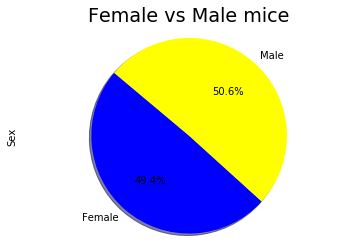

In [14]:
# Get Labels for the pie chart from the index values of the groupby dataframe
sex = list(sex_group_count.index.values)

# The values of each section of the pie chart
sex_counts = sex_group_count['Sex']

# The colors of each section of the pie chart
colors = ["blue", "yellow"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sex_counts, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Female vs Male mice")
plt.ylabel("Sex")
plt.axis("equal")
#plt.savefig("figures/PyplotPieChart.png")
plt.show()

## Quartiles, outliers and boxplots

In [15]:
# Create a subset of the combined_data dataframe where 'Drug Regimen'

# Create the drug list
four_drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
four_drugs = combined_data[combined_data['Drug Regimen'].isin(four_drug_list)]

# output of dataframe
four_drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,k403,Ramicane,Male,21,16,40,24.365505,1
2,k403,Ramicane,Male,21,16,35,26.546993,1
3,k403,Ramicane,Male,21,16,30,31.099498,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# group by 'Mouse ID'
four_last_tumor = four_drugs.groupby(['Drug Regimen','Mouse ID']).agg(\
        # Get the last value of the 'Tumor Volume (mm3)' column using a lambda function selecting the element in -1 position
        Last_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the dataframe
four_last_tumor


Last_tumor_size
Drug Regimen Mouse ID                 
Capomulin    b128               45.651
             b742               45.000
             f966               45.000
             g288               46.304
             g316               46.809
...                                ...
Ramicane     s508               45.000
             u196               47.623
             w678               45.000
             y449               46.378
             z578               45.000

[100 rows x 1 columns]

In [17]:
# Organize df with Drug Regimen as columns
four_last_tumor_unstack = four_last_tumor.stack(level=0).unstack(level=0)
# View df
four_last_tumor_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,Last_tumor_size,NaN,NaN,67.973,NaN
a251,Last_tumor_size,NaN,NaN,65.526,NaN
a275,Last_tumor_size,NaN,62.999,NaN,NaN
a411,Last_tumor_size,NaN,NaN,NaN,45.467
a444,Last_tumor_size,NaN,NaN,NaN,45.000


In [18]:
#Calculate the IQR

# Set counter to 0 which is used to only print dividing line at top of output
counter = 0
#Calculate quartile
for drug in four_drug_list:
    quartiles = four_last_tumor_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Create loop
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 45.0
The upper quartile of Capomulin is: 46.75
The interquartile range of Capomulin is: 1.75
The the median of Capomulin is: 45.89 
Values below 42.38 for Capomulin could be outliers.
Values above 49.38 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 45.0
The upper quartile of Ramicane is: 46.34
The interquartile range of Ramicane is: 1.34
The the median of Ramicane is: 45.52 
Values below 42.99 for Ramicane could be outliers.
Values above 48.35 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.16 
Values below 36.83 for Infubinol could be outliers.
V

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four drugs


# Create an empty list
boxplot_list = []

# Iterate through the list of the four drugs
# append to the boxplot_list
for drug in four_drug_list:
    boxplot_list.append(list(four_last_tumor_unstack[drug].dropna()))

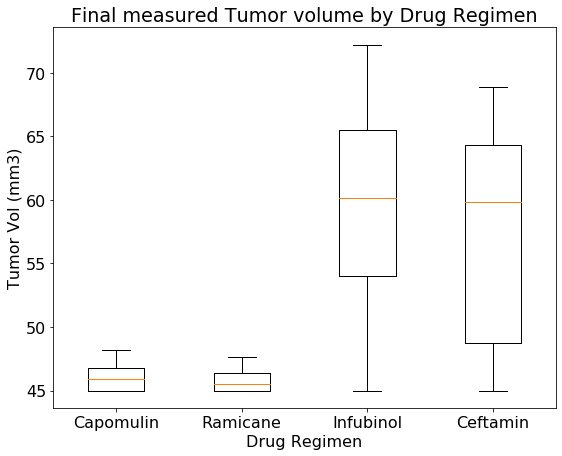

In [20]:
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],four_drug_list)

# Save the figure
#plt.savefig("figures/BoxWhiskerPlot.png")

plt.show()

## Line and scatter plots

In [21]:
# Create a df for only the Capomulin data
capomulin_data = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

# View the df
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,45,23.343598,1
11,s185,Capomulin,Female,3,17,40,25.472143,1
12,s185,Capomulin,Female,3,17,35,28.328531,1
13,s185,Capomulin,Female,3,17,30,32.959671,1
14,s185,Capomulin,Female,3,17,25,33.949940,0


In [22]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [23]:
# sem just for kicks (since no scientist would plot a line graph without error bars)

cap_time_tumor = capomulin_data.groupby(['Timepoint']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', ss.sem)\
).round(3)

# View the groupby dataframe 
cap_time_tumor.head(10)

,Tumor_Vol_Mean,Tumor_Vol_SEM
Timepoint,,
0,45.000,0.000
5,44.266,0.449
10,43.084,0.703
15,42.064,0.839
20,40.716,0.910
25,39.940,0.882
30,38.769,0.934
35,37.817,1.052
40,36.958,1.224


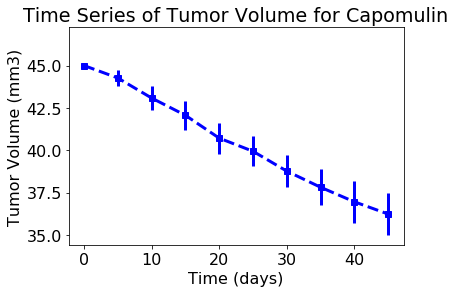

In [24]:
# Plot a line plot using error bars

# get the values for the x axis
time_series = list(cap_time_tumor.index.values)

# Use errorbar plot from matplotlib
plt.errorbar(
    time_series,  # X values
    cap_time_tumor['Tumor_Vol_Mean'], # Y values
    yerr=cap_time_tumor['Tumor_Vol_SEM'],     # Y-errors
    label="Time Series of Tumor Volume for Capomulin",
    fmt="bs--", # format line using dashed lines for plot()
    linewidth=3  # width of plot line
    )
# Add the descriptive title, x labels and y labels
plt.title("Time Series of Tumor Volume for Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")

# Set x and y limits 
plt.xlim(min(time_series)-max(time_series)*0.05, max(time_series)*1.05)
plt.ylim(min(cap_time_tumor['Tumor_Vol_Mean'])*0.95, max(cap_time_tumor['Tumor_Vol_Mean'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]

# Save the figure
#plt.savefig("figures/LineChart.png")

plt.show()

In [25]:

# View Capomulin dataframe
capomulin_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,45,23.343598,1
11,s185,Capomulin,Female,3,17,40,25.472143,1
12,s185,Capomulin,Female,3,17,35,28.328531,1
13,s185,Capomulin,Female,3,17,30,32.959671,1
14,s185,Capomulin,Female,3,17,25,33.949940,0


In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [27]:
# Groupby Mouse ID using .agg() method and get the weight and mean of tumor volume
cap_mouse_id = capomulin_data.groupby(['Mouse ID']).agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Mouse_weight=('Weight (g)', np.mean),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_vol_mean=('Tumor Volume (mm3)', np.mean)\
).round(3)
cap_mouse_id.head(30)

,Mouse_weight,Tumor_vol_mean
Mouse ID,,
b128,22,41.964
b742,21,40.084
f966,17,36.506
g288,19,41.990
g316,22,44.613
i557,24,44.806
i738,20,39.141
j119,23,44.465
j246,21,43.217


In [28]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

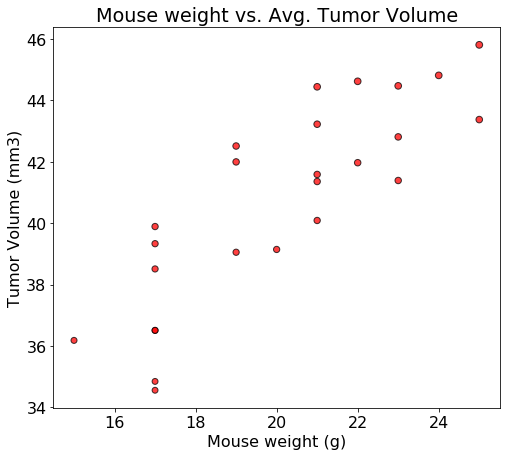

In [29]:
#create scatter plot from the above dataframe
plt.scatter(
    cap_mouse_id['Mouse_weight'],
    cap_mouse_id['Tumor_vol_mean'],
    marker='o',
    facecolors='red',
    edgecolors='black',
    s=cap_mouse_id['Tumor_vol_mean'],
    alpha=.75)

# Create a title, x label, and y label for our chart
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
# Save the figure
#plt.savefig("figures/ScatterWeightTumorVol.png")

plt.show()

In [30]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(cap_mouse_id['Mouse_weight'],cap_mouse_id['Tumor_vol_mean'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


The r-squared is: 0.8419461020261081
The equation of the regression line is: y = 0.95x + 21.55


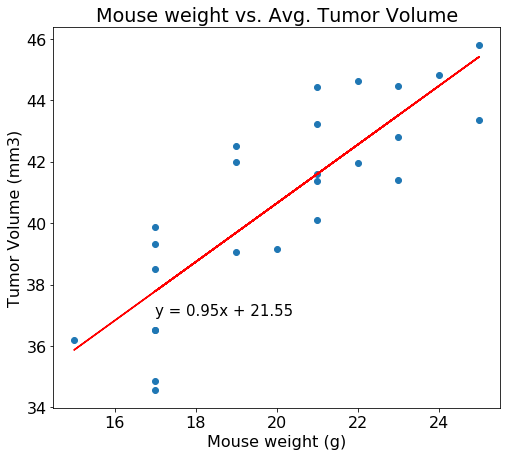

In [31]:
x_values = cap_mouse_id['Mouse_weight']
y_values = cap_mouse_id['Tumor_vol_mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,37),fontsize=15,color="black")
plt.title("Mouse weight vs. Avg. Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
print(f"The equation of the regression line is: {line_eq}")

# Save the figure
#plt.savefig("figures/ScatterWeightTumorVolRegression.png")

plt.show()